In [1]:
# Using CoinMarketCap API
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '22041784-5954-41d3-a983-a6ace14ba285',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-05-01T14:51:43.749Z', 'error_code': 0, 'error_message': None, 'elapsed': 32, 'credit_count': 1, 'notice': None, 'total_count': 9428}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10196, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
type(data)

dict

In [3]:
#pd.set_option('display.max_columns', None)

In [4]:
import pandas as pd

# transforming the data to a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now', utc=True)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10196,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.936128e+07,1.936128e+07,...,46.8577,5.979281e+11,None,2023-05-01T14:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-01 14:51:45.975256+00:00
1,1027,Ethereum,ETH,ethereum,6810,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.203939e+08,1.203939e+08,...,18.8702,2.219053e+11,None,2023-05-01T14:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-01 14:51:45.975256+00:00
2,825,Tether,USDT,tether,52340,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.171812e+10,8.509064e+10,...,6.9511,8.511571e+10,None,2023-05-01T14:50:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-05-01 14:51:45.975256+00:00
3,1839,BNB,BNB,bnb,1306,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.558626e+08,1.558626e+08,...,4.4211,5.199056e+10,None,2023-05-01T14:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-01 14:51:45.975256+00:00
4,3408,USD Coin,USDC,usd-coin,12111,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.044033e+10,3.044033e+10,...,2.5874,3.044135e+10,None,2023-05-01T14:50:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-05-01 14:51:45.975256+00:00
5,52,XRP,XRP,xrp,940,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.175081e+10,9.998900e+10,...,2.0384,4.632846e+10,None,2023-05-01T14:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-01 14:51:45.975256+00:00
6,2010,Cardano,ADA,cardano,776,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.481097e+10,3.574457e+10,...,1.1495,1.748315e+10,None,2023-05-01T14:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-01 14:51:45.975256+00:00
7,74,Dogecoin,DOGE,dogecoin,698,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.391660e+11,1.391660e+11,...,0.9308,1.095097e+10,None,2023-05-01T14:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-01 14:51:45.975256+00:00
8,3890,Polygon,MATIC,polygon,680,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, zero-knowledg...",1.000000e+10,9.249469e+09,1.000000e+10,...,0.7642,9.715498e+09,None,2023-05-01T14:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-01 14:51:45.975256+00:00
9,5426,Solana,SOL,solana,458,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.932371e+08,5.393127e+08,...,0.7387,1.191882e+10,None,2023-05-01T14:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-01 14:51:45.975256+00:00


In [5]:
# automating the gathering of data
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '22041784-5954-41d3-a983-a6ace14ba285',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now', utc=True)
    df = pd.concat([df2])
    
    if not os.path.isfile(r'Coinbase_API.csv'):
        df.to_csv(r'Coinbase_API.csv', header ='column_names')
    else:
        df.to_csv(r'Coinbase_API.csv', mode='a', header=False)


In [6]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print("API runner completed!")
    sleep(60) # sleep for 1 minute
exit()

API runner completed!
API runner completed!


KeyboardInterrupt: 

In [ ]:
df_test = pd.read_csv(r'Coinbase_API.csv')

In [7]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10196,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.936128e+07,1.936128e+07,...,46.8751,5.981492e+11,None,2023-05-01T14:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-01 14:52:52.888427+00:00
1,1027,Ethereum,ETH,ethereum,6810,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.203939e+08,1.203939e+08,...,18.8669,2.219810e+11,None,2023-05-01T14:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-01 14:52:52.888427+00:00
2,825,Tether,USDT,tether,52340,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.171812e+10,8.509064e+10,...,6.9467,8.510575e+10,None,2023-05-01T14:51:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-05-01 14:52:52.888427+00:00
3,1839,BNB,BNB,bnb,1306,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.558626e+08,1.558626e+08,...,4.4197,5.200095e+10,None,2023-05-01T14:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-01 14:52:52.888427+00:00
4,3408,USD Coin,USDC,usd-coin,12111,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.044033e+10,3.044033e+10,...,2.5873,3.044038e+10,None,2023-05-01T14:51:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-05-01 14:52:52.888427+00:00
5,52,XRP,XRP,xrp,940,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.175081e+10,9.998900e+10,...,2.0386,4.633295e+10,None,2023-05-01T14:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-01 14:52:52.888427+00:00
6,2010,Cardano,ADA,cardano,776,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.481097e+10,3.574457e+10,...,1.1495,1.748213e+10,None,2023-05-01T14:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-01 14:52:52.888427+00:00
7,74,Dogecoin,DOGE,dogecoin,698,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.391660e+11,1.391660e+11,...,0.9310,1.095257e+10,None,2023-05-01T14:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-01 14:52:52.888427+00:00
8,3890,Polygon,MATIC,polygon,680,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, zero-knowledg...",1.000000e+10,9.249469e+09,1.000000e+10,...,0.7640,9.718868e+09,None,2023-05-01T14:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-01 14:52:52.888427+00:00
9,5426,Solana,SOL,solana,458,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.932371e+08,5.393127e+08,...,0.7389,1.192239e+10,None,2023-05-01T14:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-01 14:52:52.888427+00:00


In [8]:
pd.set_option('display.float_format', lambda x: '%5f' % x)

In [9]:
## checking the columns 
df.columns

Index(['id', 'name', 'symbol', 'slug', 'num_market_pairs', 'date_added',
       'tags', 'max_supply', 'circulating_supply', 'total_supply',
       'infinite_supply', 'platform', 'cmc_rank',
       'self_reported_circulating_supply', 'self_reported_market_cap',
       'tvl_ratio', 'last_updated', 'quote.USD.price', 'quote.USD.volume_24h',
       'quote.USD.volume_change_24h', 'quote.USD.percent_change_1h',
       'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
       'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d',
       'quote.USD.percent_change_90d', 'quote.USD.market_cap',
       'quote.USD.market_cap_dominance', 'quote.USD.fully_diluted_market_cap',
       'quote.USD.tvl', 'quote.USD.last_updated', 'platform.id',
       'platform.name', 'platform.symbol', 'platform.slug',
       'platform.token_address', 'timestamp'],
      dtype='object')

In [10]:
df3 = df.groupby('name', sort=False)[['quote.USD.volume_change_24h','quote.USD.percent_change_30d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.volume_change_24h,quote.USD.percent_change_30d,quote.USD.percent_change_90d
name,,,
Bitcoin,80.230400,0.395821,23.018997
Ethereum,98.920100,1.310977,16.264253
Tether,100.720900,-0.033190,0.010552
BNB,160.163800,6.173832,6.837589
USD Coin,35.546300,0.001066,-0.019974
XRP,92.145500,-9.325115,15.137742
Cardano,109.544300,-0.716752,1.861536
Dogecoin,27.783000,3.145433,-15.681280
Polygon,23.701300,-12.047825,-12.118140


In [11]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.volume_change_24h     80.230400
             quote.USD.percent_change_30d     0.395821
             quote.USD.percent_change_90d    23.018997
Ethereum     quote.USD.volume_change_24h     98.920100
             quote.USD.percent_change_30d     1.310977
             quote.USD.percent_change_90d    16.264253
Tether       quote.USD.volume_change_24h    100.720900
             quote.USD.percent_change_30d    -0.033190
             quote.USD.percent_change_90d     0.010552
BNB          quote.USD.volume_change_24h    160.163800
             quote.USD.percent_change_30d     6.173832
             quote.USD.percent_change_90d     6.837589
USD Coin     quote.USD.volume_change_24h     35.546300
             quote.USD.percent_change_30d     0.001066
             quote.USD.percent_change_90d    -0.019974
XRP          quote.USD.volume_change_24h     92.145500
             quote.USD.percent_change_30d    -9.325115
             quote.USD.

In [12]:
type(df4)

pandas.core.series.Series

In [16]:
df5.count()

values    45
dtype: int64

In [13]:
df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin     quote.USD.volume_change_24h   80.230400
            quote.USD.percent_change_30d   0.395821
            quote.USD.percent_change_90d  23.018997
Ethereum    quote.USD.volume_change_24h   98.920100
            quote.USD.percent_change_30d   1.310977
            quote.USD.percent_change_90d  16.264253
Tether      quote.USD.volume_change_24h  100.720900
            quote.USD.percent_change_30d  -0.033190
            quote.USD.percent_change_90d   0.010552
BNB         quote.USD.volume_change_24h  160.163800
            quote.USD.percent_change_30d   6.173832
            quote.USD.percent_change_90d   6.837589
USD Coin    quote.USD.volume_change_24h   35.546300
            quote.USD.percent_change_30d   0.001066
            quote.USD.percent_change_90d  -0.019974
XRP         quote.USD.volume_change_24h   92.145500
            quote.USD.percent_change_30d  -9.325115
            quote.USD.percent_change_90d  15.137742
Cardano     quote.USD.volume_change_24h  109.544300
            quote.USD.percent_change_30d  -0.716752
            quote.USD.percent_change_90d   1.861536
Dogecoin    quote.USD.volume_change_24h   27.783000
            quote.USD.percent_change_30d   3.145433
            quote.USD.percent_change_90d -15.681280
Polygon     quote.USD.volume_change_24h   23.701300
            quote.USD.percent_change_30d -12.047825
            quote.USD.percent_change_90d -12.118140
Solana      quote.USD.volume_change_24h   57.493200
            quote.USD.percent_change_30d   5.471707
            quote.USD.percent_change_90d  -8.516812
Polkadot    quote.USD.volume_change_24h   19.925400
            quote.USD.percent_change_30d  -7.369352
            quote.USD.percent_change_90d  -7.465756
Litecoin    quote.USD.volume_change_24h   57.433200
            quote.USD.percent_change_30d  -6.039786
            quote.USD.percent_change_90d  -7.366881
TRON        quote.USD.volume_change_24h   58.431100
            quote.USD.percent_change_30d   3.706847
            quote.USD.percent_change_90d  10.739226
Binance USD quote.USD.volume_change_24h   97.230000
            quote.USD.percent_change_30d   0.039368
            quote.USD.percent_change_90d  -0.043154
Shiba Inu   quote.USD.volume_change_24h  102.500000
            quote.USD.percent_change_30d  -8.644565
            quote.USD.percent_change_90d -15.293700

In [22]:
index = pd.Index(range(45))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.volume_change_24h,80.230400
1,Bitcoin,quote.USD.percent_change_30d,0.395821
2,Bitcoin,quote.USD.percent_change_90d,23.018997
3,Ethereum,quote.USD.volume_change_24h,98.920100
4,Ethereum,quote.USD.percent_change_30d,1.310977
5,Ethereum,quote.USD.percent_change_90d,16.264253
6,Tether,quote.USD.volume_change_24h,100.720900
7,Tether,quote.USD.percent_change_30d,-0.033190
8,Tether,quote.USD.percent_change_90d,0.010552
9,BNB,quote.USD.volume_change_24h,160.163800


In [23]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.volume_change_24h,80.230400
1,Bitcoin,quote.USD.percent_change_30d,0.395821
2,Bitcoin,quote.USD.percent_change_90d,23.018997
3,Ethereum,quote.USD.volume_change_24h,98.920100
4,Ethereum,quote.USD.percent_change_30d,1.310977
5,Ethereum,quote.USD.percent_change_90d,16.264253
6,Tether,quote.USD.volume_change_24h,100.720900
7,Tether,quote.USD.percent_change_30d,-0.033190
8,Tether,quote.USD.percent_change_90d,0.010552
9,BNB,quote.USD.volume_change_24h,160.163800


In [30]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_30d', 'quote.USD.volume_change_24h','quote.USD.percent_change_90d'],['30d', '24h', '90d'])
df7

,name,percent_change,values
0,Bitcoin,24h,80.230400
1,Bitcoin,30d,0.395821
2,Bitcoin,90d,23.018997
3,Ethereum,24h,98.920100
4,Ethereum,30d,1.310977
5,Ethereum,90d,16.264253
6,Tether,24h,100.720900
7,Tether,30d,-0.033190
8,Tether,90d,0.010552
9,BNB,24h,160.163800


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

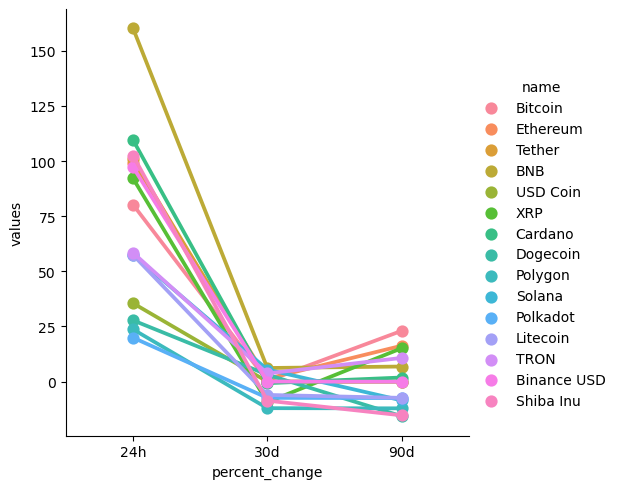

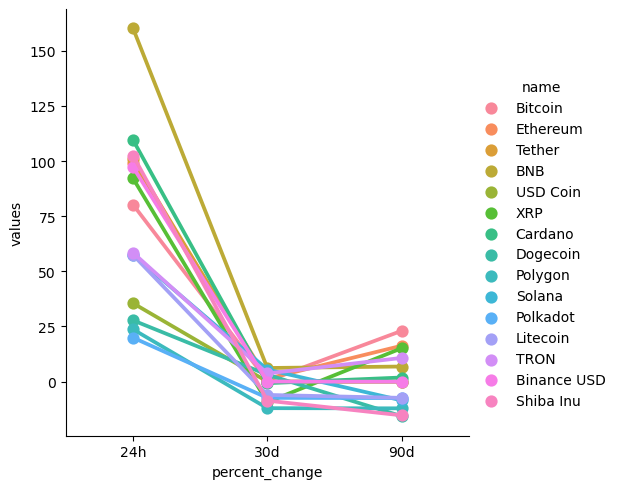

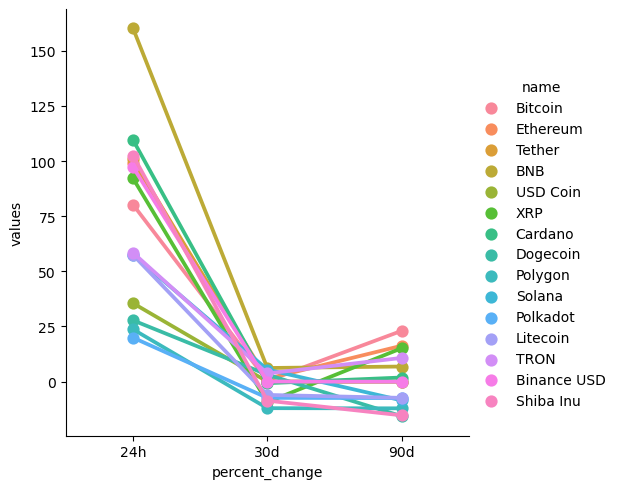

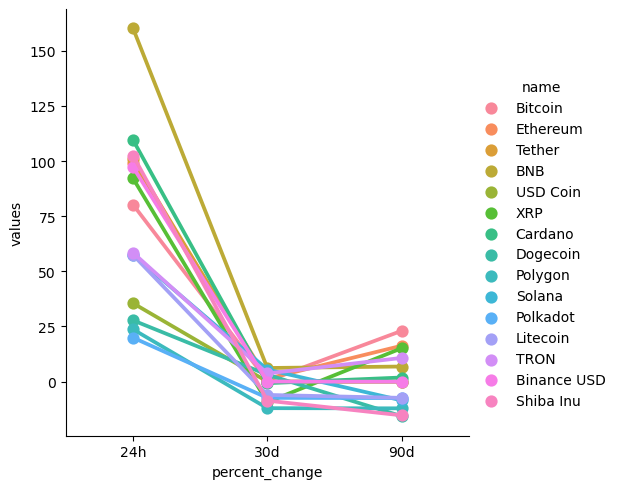

In [32]:
sns.catplot(x='percent_change', y ='values', hue='name',data=df7, kind='point')
plt.show()